In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

***Sentetik sınıflandırma verileri oluşturmak için scikit-learn'in yerleşik make_classification yöntemini kullanın***

In [2]:
from sklearn.datasets import make_classification

***İki bilgilendirici özellik (Sıcaklık, Nem) ve bir yedek özellik 'Suç' kullandım***

In [3]:
X,y = make_classification(n_samples=35040, n_classes=2, n_features=3, n_informative=2, n_redundant=1,
                          weights=[0.999, 0.001], class_sep=1.0)

In [4]:
df = pd.DataFrame(data = X, columns=['Temp', 'Humidity', 'Crime'])

In [5]:
df['y'] = y

In [7]:
df['Temp'] = df['Temp']-min(df['Temp'])
maxt = max(df['Temp'])
df['Temp']=90*df['Temp']/maxt

In [9]:
df['Humidity'] = df['Humidity']-min(df['Humidity'])
maxh = max(df['Humidity'])
df['Humidity'] = 100*df['Humidity']/maxh

In [10]:
df['Crime'] = df['Crime']-min(df['Crime'])
maxc = max(df['Crime'])
df['Crime'] = 10*df['Crime']/maxc

array([[<AxesSubplot:title={'center':'Temp'}>]], dtype=object)

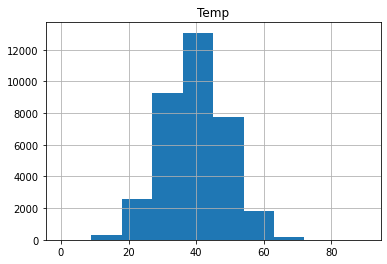

In [11]:
df.hist('Temp')

array([[<AxesSubplot:title={'center':'Humidity'}>]], dtype=object)

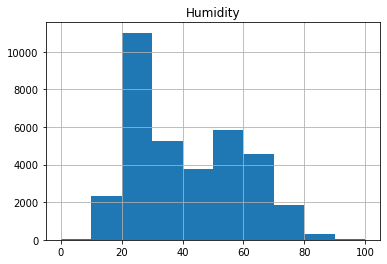

In [12]:
df.hist('Humidity')

array([[<AxesSubplot:title={'center':'Crime'}>]], dtype=object)

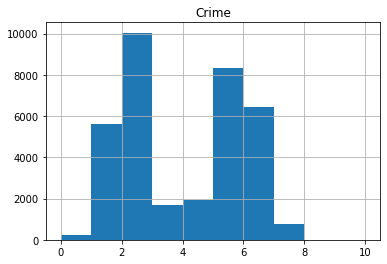

In [13]:
df.hist('Crime')

***Pozitif örneklerin sayısını saymak için df['y']==1 ile Boole dizisi üzerinde bir toplam alın***

In [15]:
sum(df['y']==1)

194

In [16]:
df.head(10)

,Temp,Humidity,Crime,y
0,47.889480,25.528496,6.725909,0
1,40.033881,52.059180,2.837829,0
2,35.154033,25.489128,5.466759,0
3,36.248604,29.223258,5.137854,0
4,29.000905,15.327053,6.046844,0
5,48.566449,70.173322,1.562131,0
6,39.723631,24.302892,6.059198,0
7,43.432857,57.672352,2.517431,0
8,34.131508,21.260541,5.860747,0
9,33.107061,21.468470,5.734727,0


In [17]:
df.describe()

,Temp,Humidity,Crime,y
count,35040.000000,35040.000000,35040.000000,35040.000000
mean,39.629526,41.441082,4.041808,0.005537
std,9.164619,17.790513,1.903835,0.074203
min,0.000000,0.000000,0.000000,0.000000
25%,33.477643,26.091068,2.246331,0.000000
50%,39.563207,36.313068,3.856416,0.000000
75%,45.866895,56.754292,5.838659,0.000000
max,90.000000,100.000000,10.000000,1.000000


# **Lojistik Regresyon alt örnekleme**

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

***Negatif sınıfı sınırlı sayıda örneklemek***

In [19]:
df0 = df[df['y']==0].sample(800)
df1 = df[df['y']==1]
df_balanced = pd.concat([df0,df1],axis=0)
df_balanced.describe()

,Temp,Humidity,Crime,y
count,994.000000,994.000000,994.000000,994.000000
mean,40.297359,41.832674,4.062196,0.195171
std,10.237158,18.009996,1.892693,0.396532
min,13.110243,10.562531,0.381814,0.000000
25%,33.270992,26.437230,2.235978,0.000000
50%,39.658680,37.803613,4.228934,0.000000
75%,46.641758,56.260473,5.824460,0.000000
max,90.000000,96.933510,10.000000,1.000000


Text(0.5, 1.0, 'Relative frequency of positive and negative classes\n in the balanced (under-sampled) dataset')

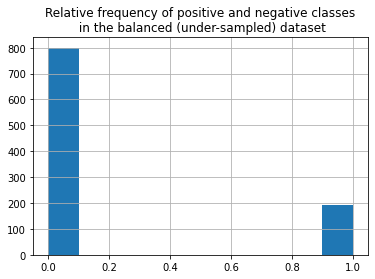

In [20]:
df_balanced.hist('y')
plt.title("Relative frequency of positive and negative classes\n in the balanced (under-sampled) dataset")

In [21]:
log_model_balanced = LogisticRegressionCV(cv=5, class_weight='balanced')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop('y', axis=1),
                                                    df_balanced['y'], test_size=0.30)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
log_model_balanced.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=5)

In [29]:
print(classification_report(y_test, log_model_balanced.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       244
           1       0.18      1.00      0.31        55

    accuracy                           0.18       299
   macro avg       0.09      0.50      0.16       299
weighted avg       0.03      0.18      0.06       299



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

***Az örnekleme derecesinin F1-skorunu, kesinliği ve geri çağırmayı nasıl etkilediğine dair bir deney yaptım***

In [31]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
n_neg = [i for i in range(200, 4200, 200)]

df1 = df[df['y']==1]
F1_scores = []
precision_scores = []
recall_scores = []

for num in n_neg:
  # Az örneklenmiş veri setleri oluşturma
  df0 = df[df['y']==0].sample(num)
  df_balanced = pd.concat([df0, df1], axis=0)
  # 'class_weight=balanced' ve 5 katlı çapraz doğrulama ile model oluşturun
  log_models = LogisticRegressionCV(cv=5, class_weight='balanced')
  # Test/antrenman bölünmeleri oluşturun
  x_train, X_test, y_train, y_test = train_test_split(df_balanced.drop('y', axis=1),
                                                      df_balanced['y'], test_size=0.30)
  # Eğitim verilerini min-maks ölçeklendirir
  X_train = scaler.fit_transform(X_train)

  # Lojistik regresyon modelini uydurun
  log_models.fit(X_train, y_train)

  # Çeşitli puanları hesaplayın
  F1_scores.append(f1_score(y_test,log_models.predict(X_test)))
  precision_scores.append(precision_score(y_test,log_models.predict(X_test)))
  recall_scores.append(recall_score(y_test,log_models.predict(X_test)))

In [ ]:
plt.scatter(n_neg.F1_scores,color='green',edgecolor='black',alpha=0.6,s=100)
plt.title("F1-score as function of negative samples")
plt.grid(True)
plt.ylabel("F1-score")
plt.xlabel("Number of negative samples")

       F1-score as function of negative samples
       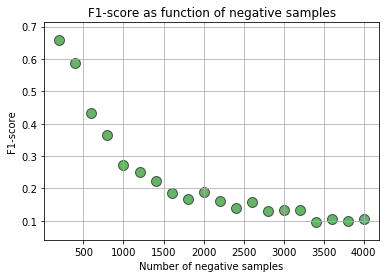

In [ ]:
plt.scatter(n_neg.precision_scores,color='orange',edgecolor='black',alpha=0.6,s=100)
plt.title("Precision score as function of negative samples")
plt.grid(True)
plt.ylabel("Precision score")
plt.xlabel("Number of negative samples")

      Precision score as function of negative samples
      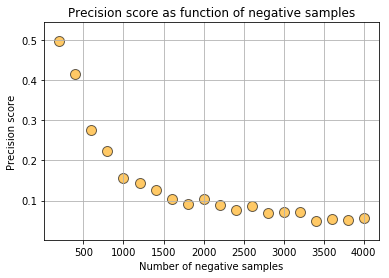

In [ ]:
plt.scatter(n_neg,recall_scores,color='blue',edgecolor='black',alpha=0.6,s=100)
plt.title("Recall score as function of negative samples")
plt.grid(True)
plt.ylabel("Recall score")
plt.xlabel("Number of negative samples")

      Recall score as function of negative samples
      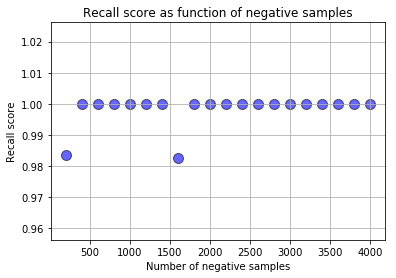

***Dolayısıyla, daha fazla negatif örnekle hassasiyet hızla düşer ve F1 puanı da düşer. Geri çağırma, negatif örneklerin pozitif örneklerle karıştırılmasından büyük ölçüde etkilenmez.***